In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

from scipy import stats

In [62]:
data=pd.read_csv(r"C:\Users\engmo\OneDrive\Desktop\python_trials\data.csv") # agriculture data

In [63]:
data.shape

(2200, 8)

In [64]:
df=data

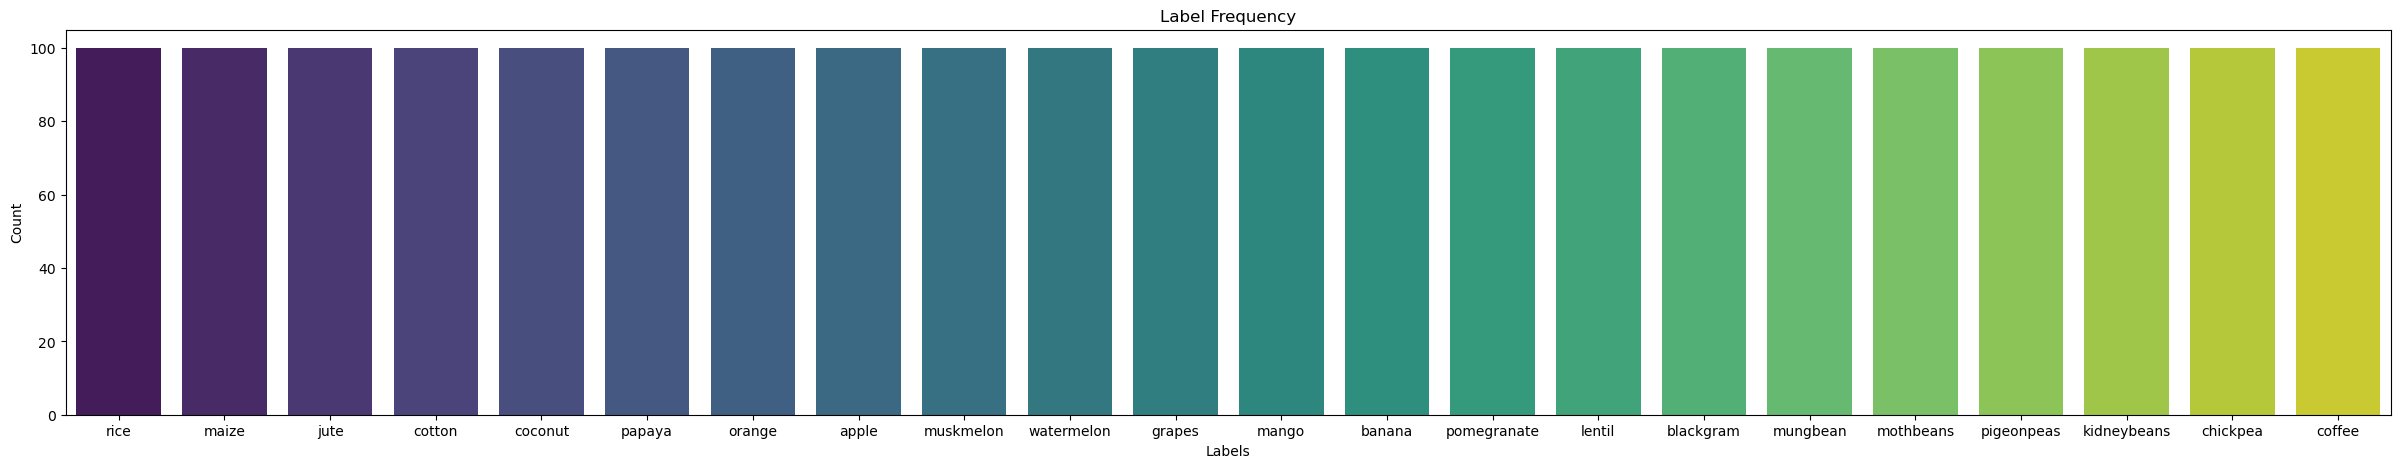

In [65]:
label_counts = df['label'].value_counts()

# Plotting
plt.figure(figsize=(30, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Label Frequency')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [66]:
unique_values = df['label'].unique()
print (unique_values)
unique_count = df['label'].nunique()
print (unique_count)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
22


In [67]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [68]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [69]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [70]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000  


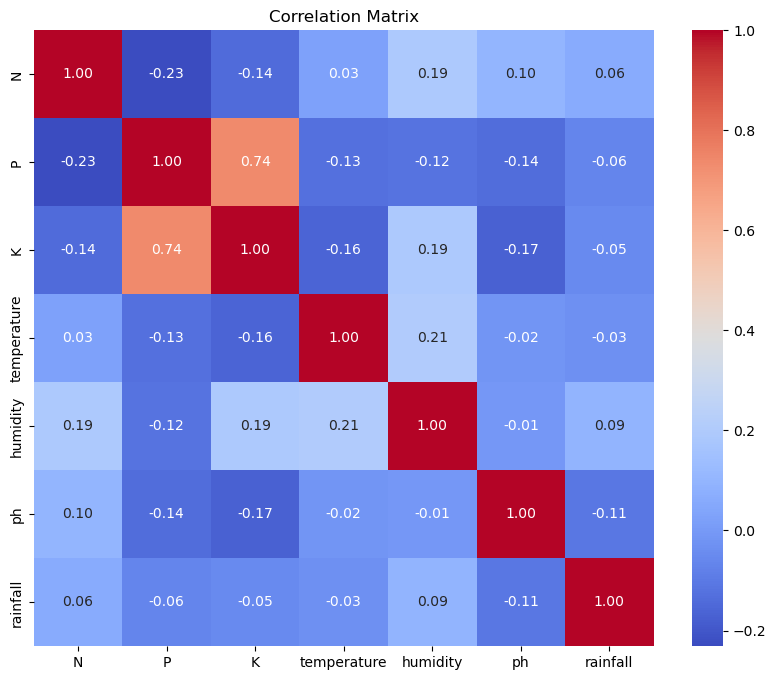

In [71]:
#interpreting the effect of various factors on life expected range
numeric_data = data.select_dtypes(include='number')


# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


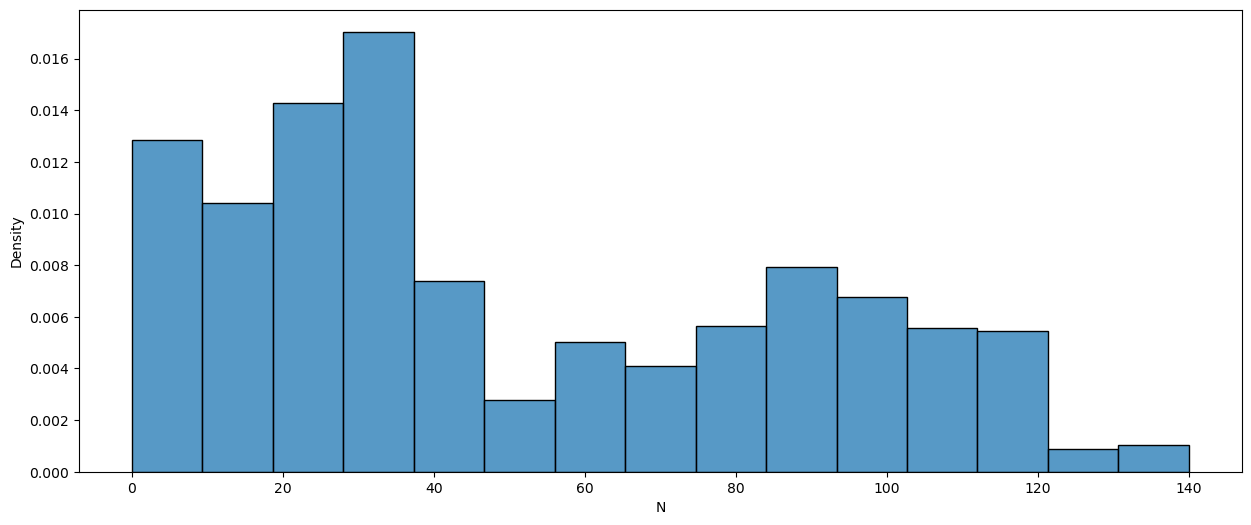

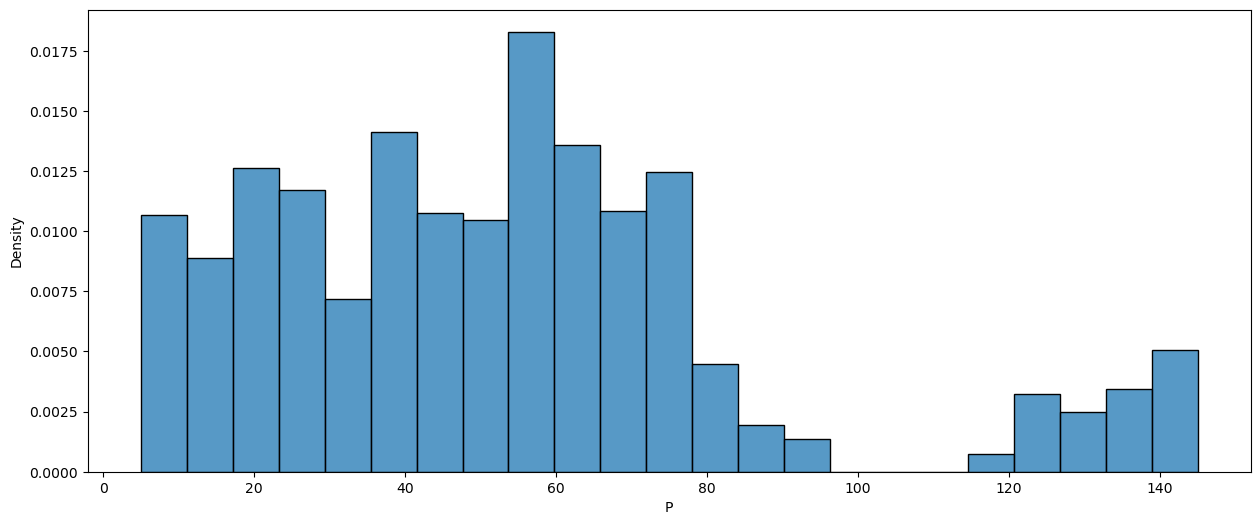

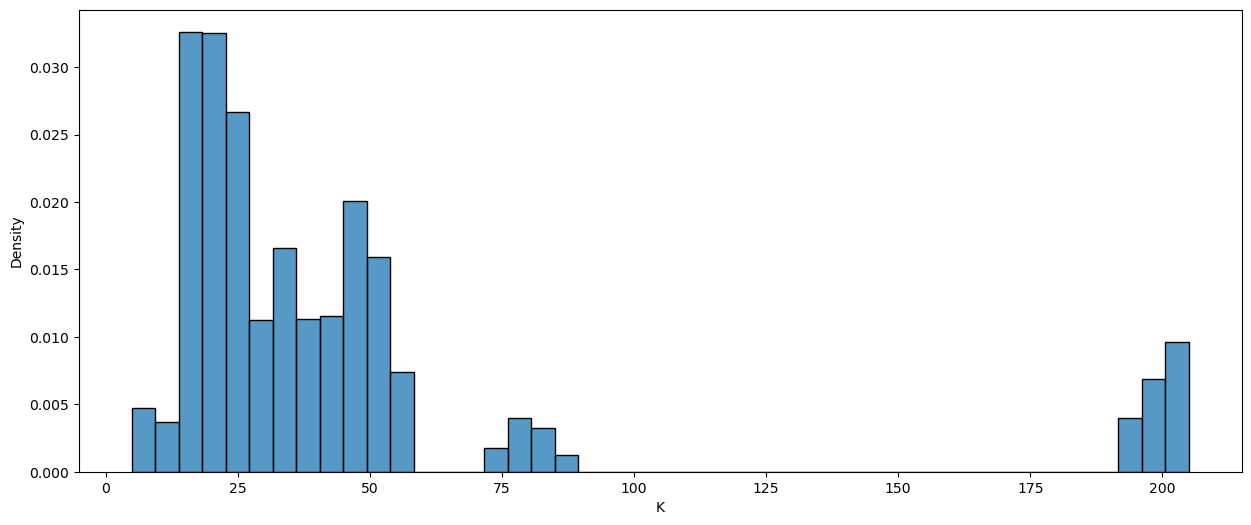

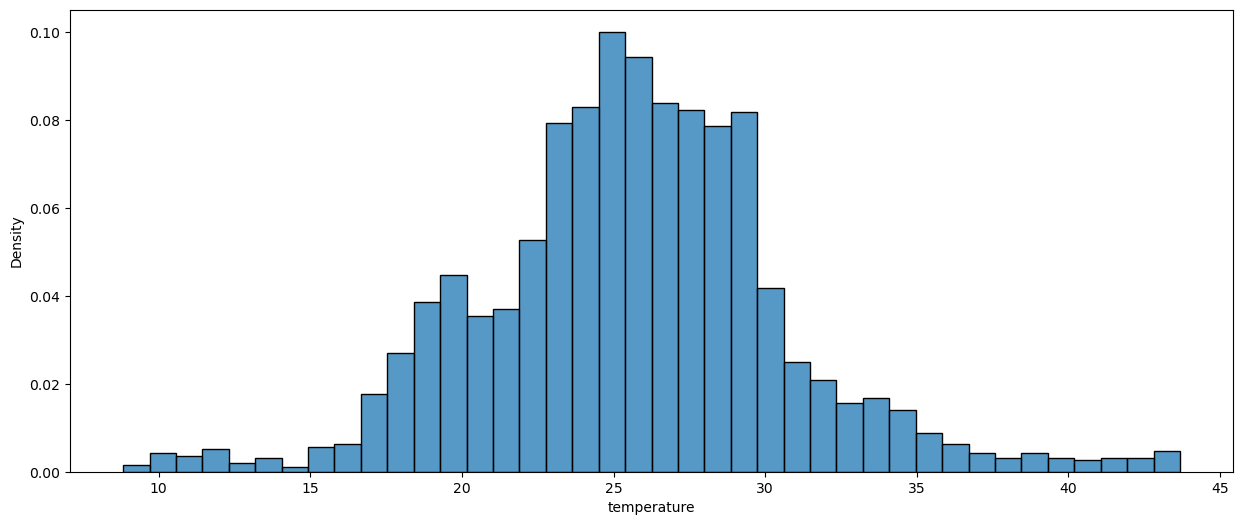

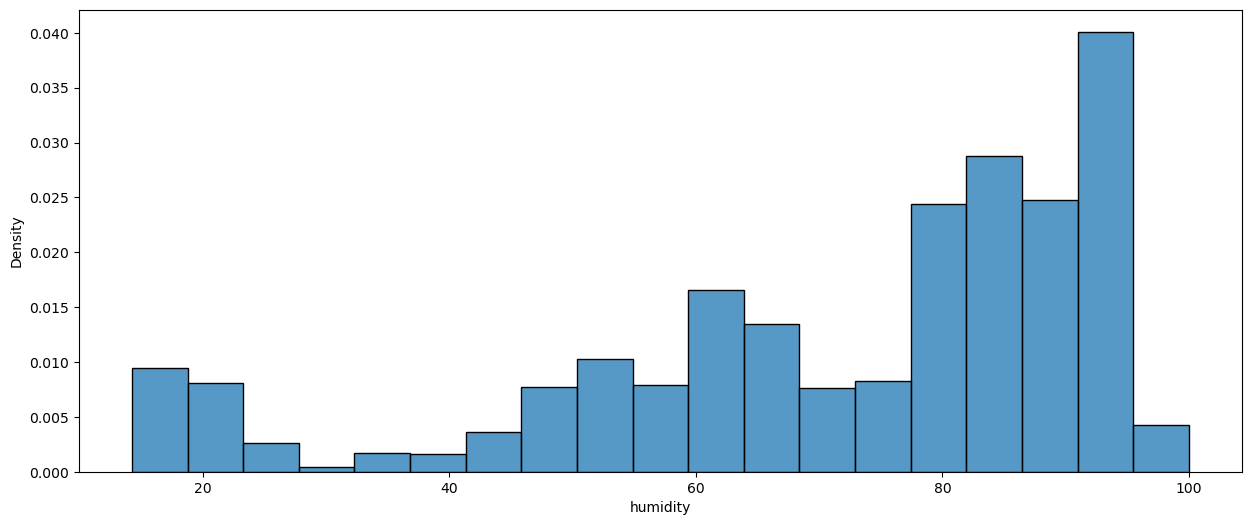

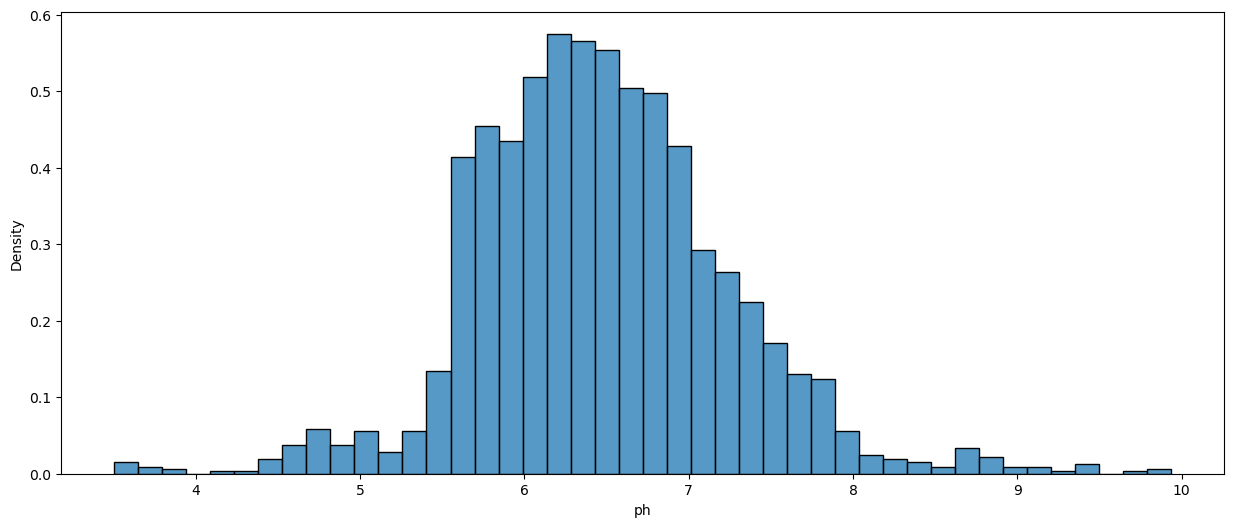

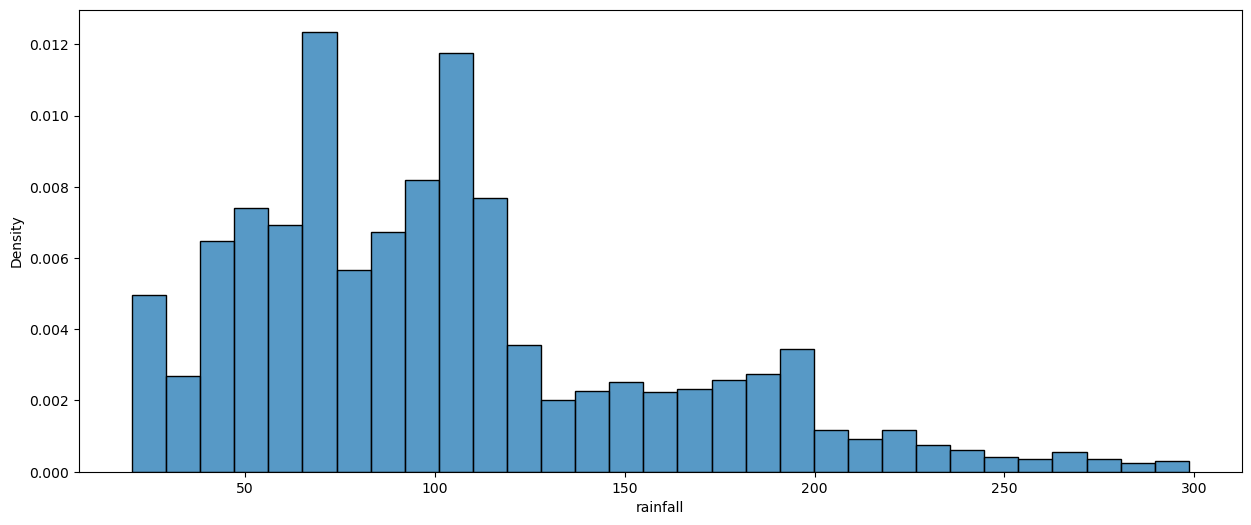

In [72]:
for i in data.select_dtypes(include="number").columns:#loop about the column not a range
  #sns.histplot(data[i])
  plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visibility
  sns.histplot(data[i], stat="density")

  plt.show()

In [73]:

    # Set significance level
alpha = 0.05

# Dictionary to store results
results = {}

# Loop through each numeric column and perform Shapiro-Wilk test
for column in data.select_dtypes(include="number").columns:

        sample_data = data[column].dropna()  # Remove NaN values
        statistic, p_value = stats.shapiro(sample_data)
    
    # Store results
        results[column] = {
            'Statistic': statistic,
            'P-value': p_value,
            'Normal Distribution': p_value > alpha
    }

# Print results
for column, result in results.items():
        print(f"Column: {column}")
        print(f"  Statistic: {result['Statistic']}, P-value: {result['P-value']}")
        print(f"  Normal Distribution: {'Yes' if result['Normal Distribution'] else 'No'}\n")

Column: N
  Statistic: 0.915395975112915, P-value: 2.131412418053718e-33
  Normal Distribution: No

Column: P
  Statistic: 0.9111679196357727, P-value: 4.70931322272225e-34
  Normal Distribution: No

Column: K
  Statistic: 0.6055315732955933, P-value: 0.0
  Normal Distribution: No

Column: temperature
  Statistic: 0.9820969104766846, P-value: 5.256294717922083e-16
  Normal Distribution: No

Column: humidity
  Statistic: 0.8663649559020996, P-value: 8.31062475043262e-40
  Normal Distribution: No

Column: ph
  Statistic: 0.9791038632392883, P-value: 1.9589689967536052e-17
  Normal Distribution: No

Column: rainfall
  Statistic: 0.9302678108215332, P-value: 7.2825396814515775e-31
  Normal Distribution: No



0       12.927268
1       12.572627
2       10.581564
3       11.746350
4       12.054729
          ...    
2168    14.052619
2169    13.537341
2170    14.725179
2171    14.665612
2172    13.862152
Name: N, Length: 2173, dtype: float64
Optimal lambda for N data is: 0.40822280980154996


C:\Users\engmo\AppData\Local\Temp\ipykernel_42944\1297661683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = transformed_values #updated


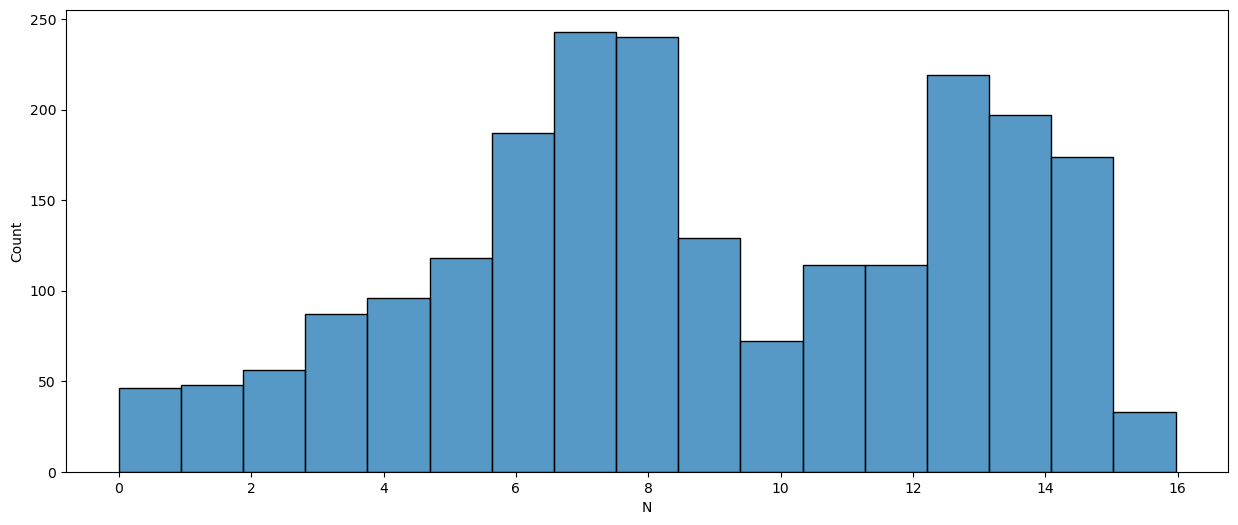

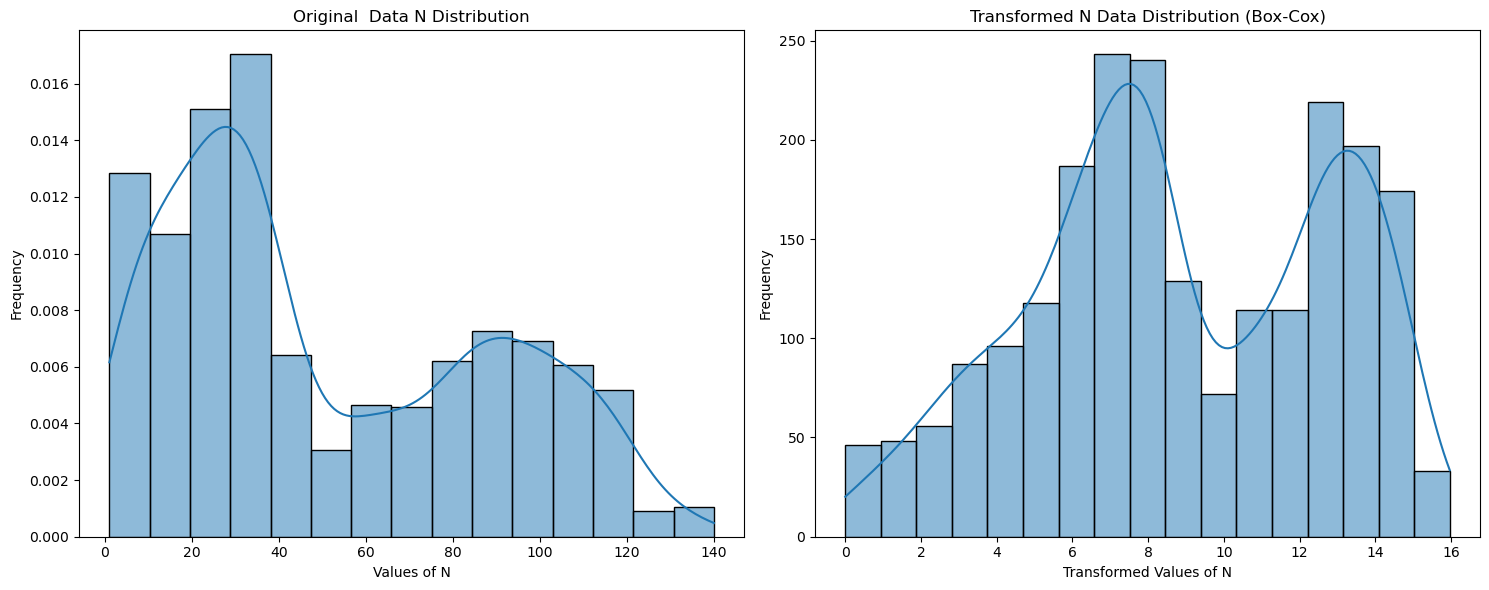

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9624803066253662, p-value=2.636603965949489e-23


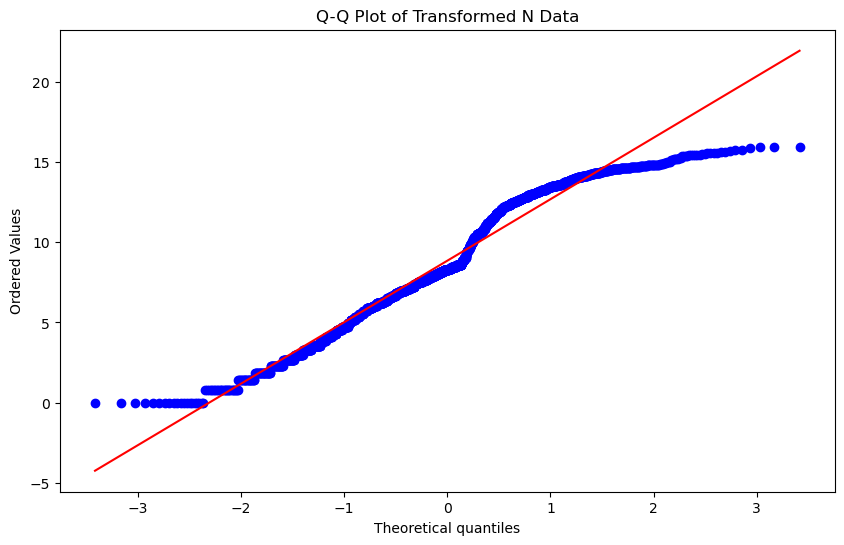

0        8.551037
1       10.058298
2        9.796893
3        7.780849
4        8.551037
          ...    
2168     7.663427
2169     4.847281
2170     7.543896
2171     7.422154
2172     5.398366
Name: P, Length: 2173, dtype: float64


C:\Users\engmo\AppData\Local\Temp\ipykernel_42944\1297661683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = transformed_values #updated


Optimal lambda for P data is: 0.39507548702895473


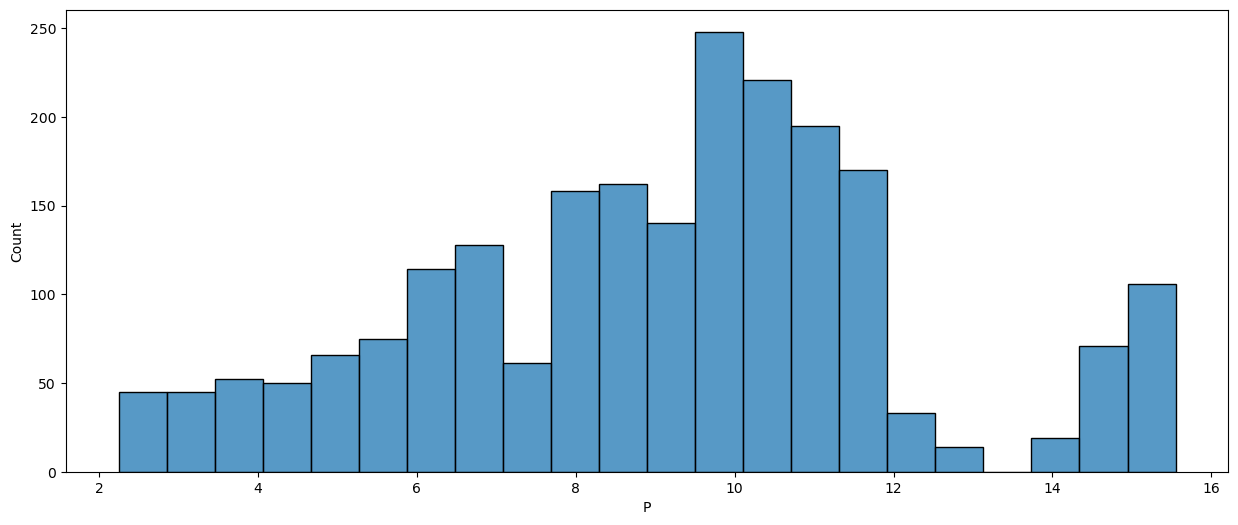

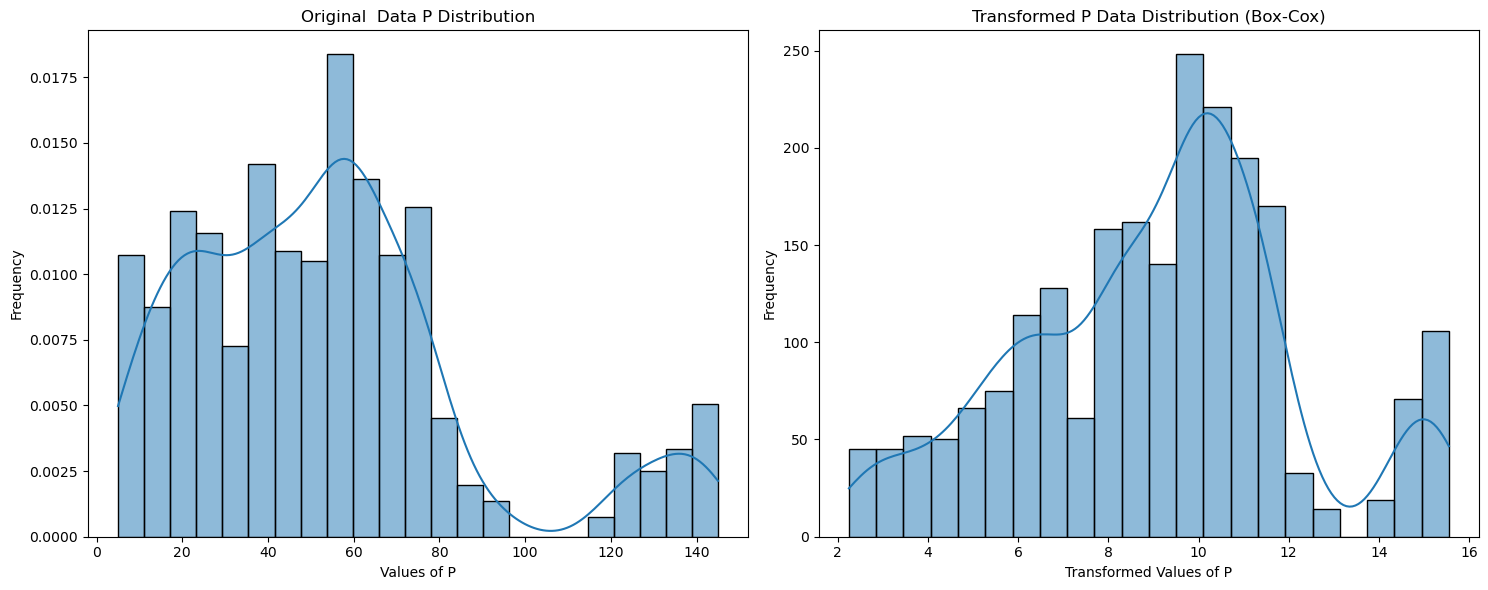

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9772898554801941, p-value=4.150215355313837e-18


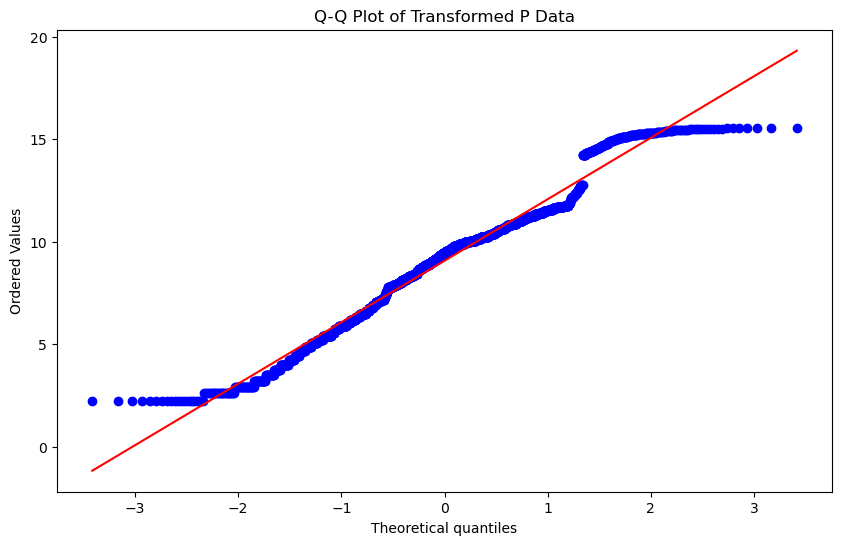

0       2.144430
1       2.130715
2       2.150973
3       2.123518
4       2.137681
          ...   
2168    2.055727
2169    2.000625
2170    2.035162
2171    2.074646
2172    2.035162
Name: K, Length: 2173, dtype: float64
Optimal lambda for K data is: -0.3331023521943647


C:\Users\engmo\AppData\Local\Temp\ipykernel_42944\1297661683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = transformed_values #updated


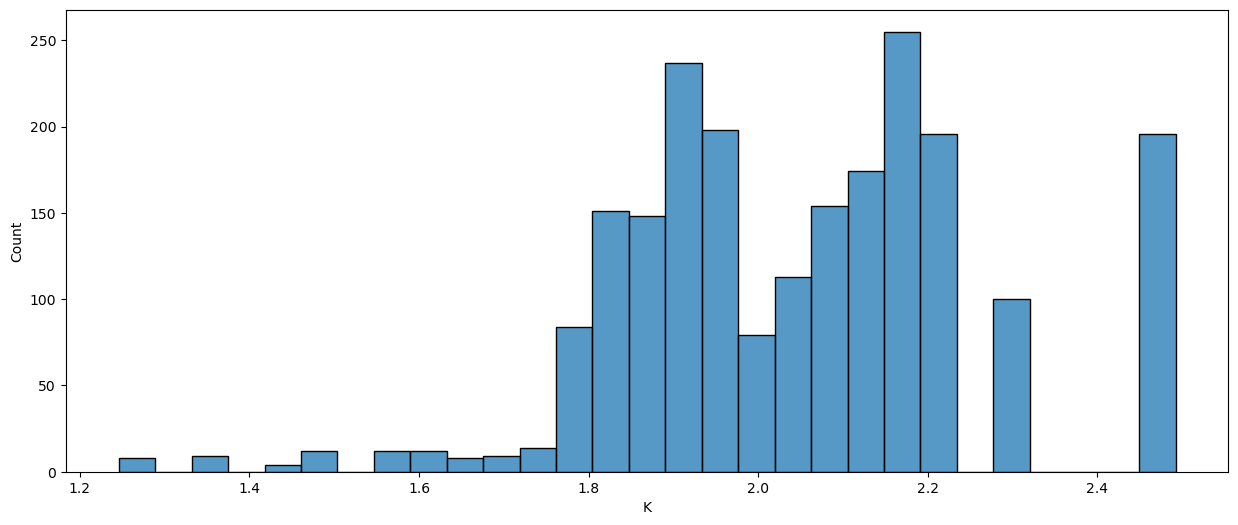

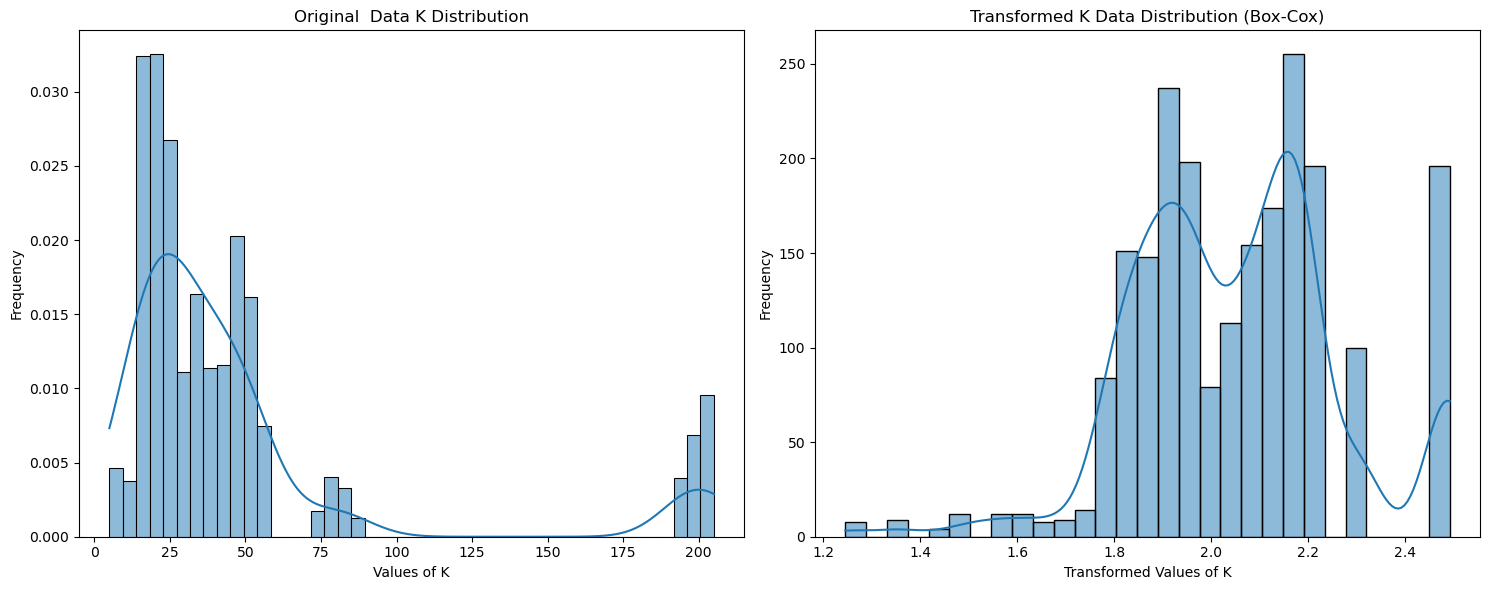

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9619807600975037, p-value=1.881832107025793e-23


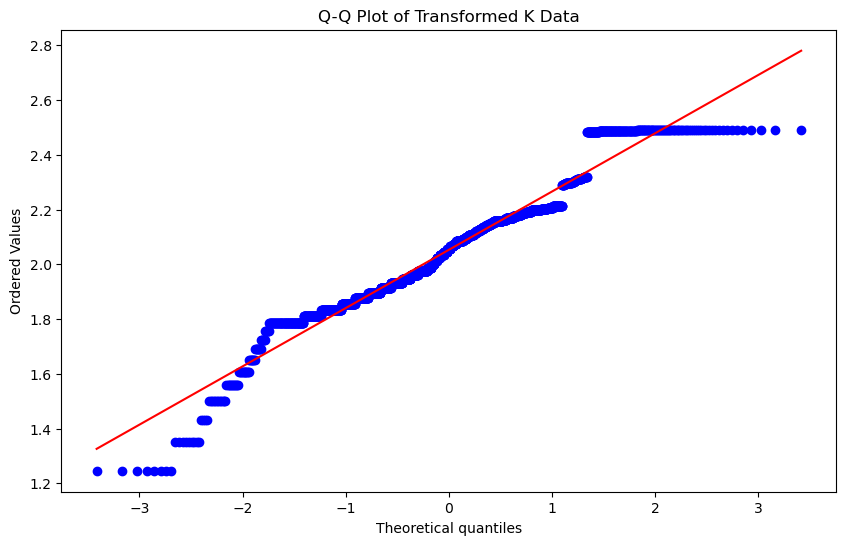

0       15.693590
1       16.331075
2       17.209568
3       19.664894
4       15.154821
          ...    
2168    19.862950
2169    20.310883
2170    18.007630
2171    19.511986
2172    17.633816
Name: temperature, Length: 2173, dtype: float64


C:\Users\engmo\AppData\Local\Temp\ipykernel_42944\1297661683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = transformed_values #updated


Optimal lambda for temperature data is: 0.8906800595498215


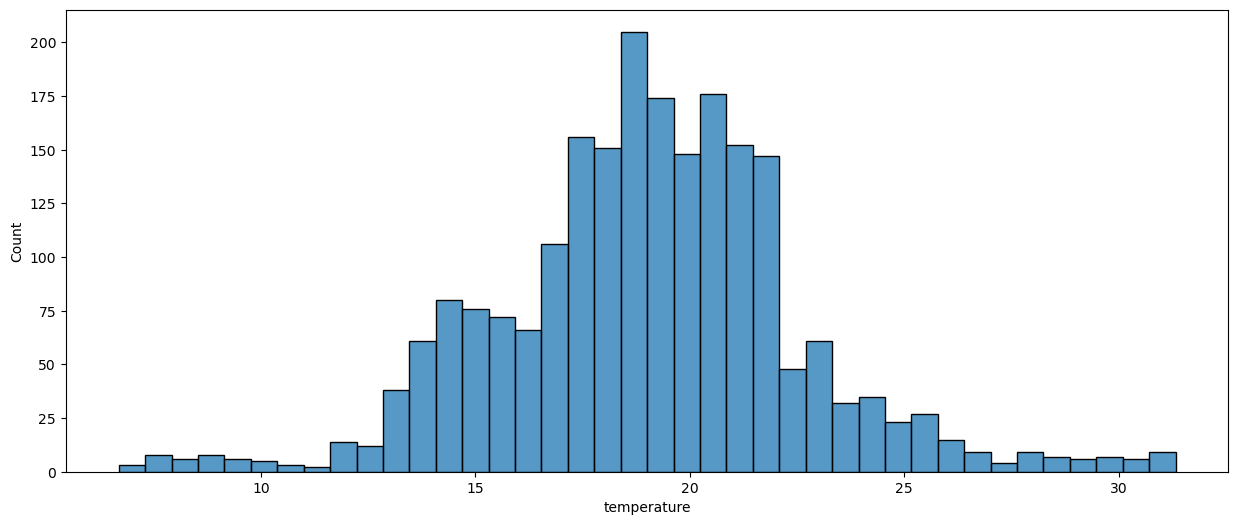

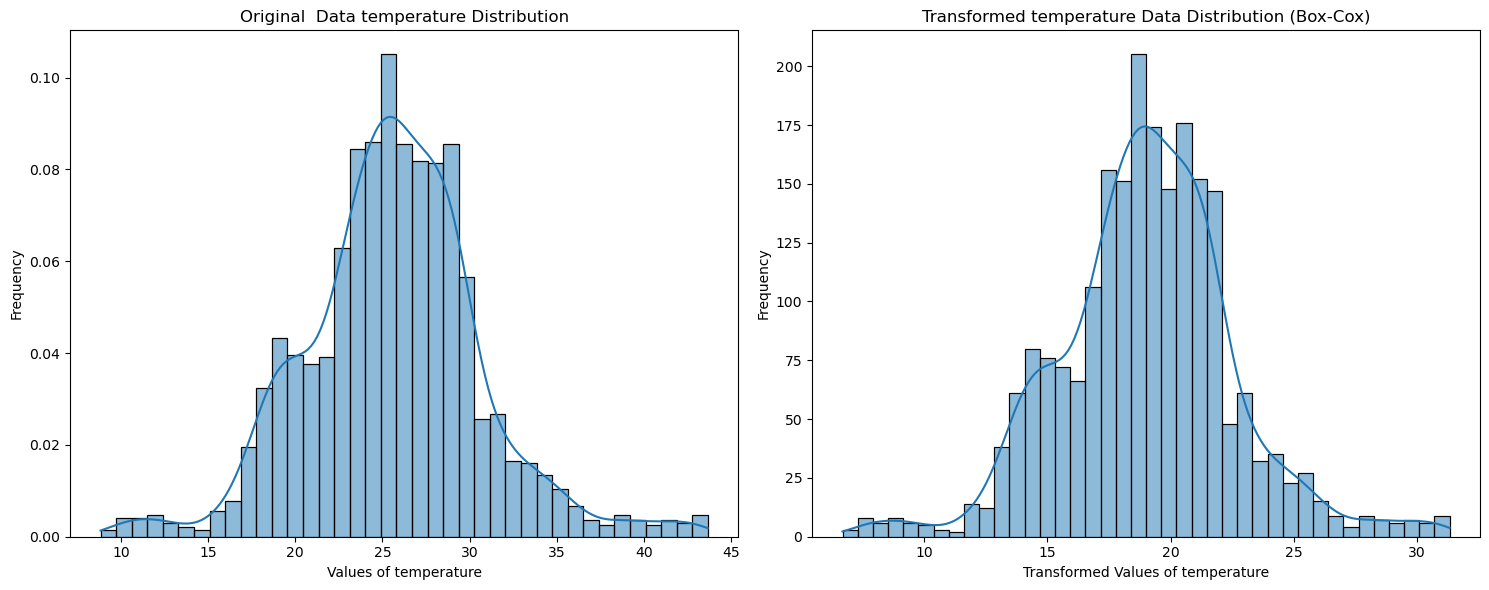

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9824681878089905, p-value=1.0519879213146473e-15


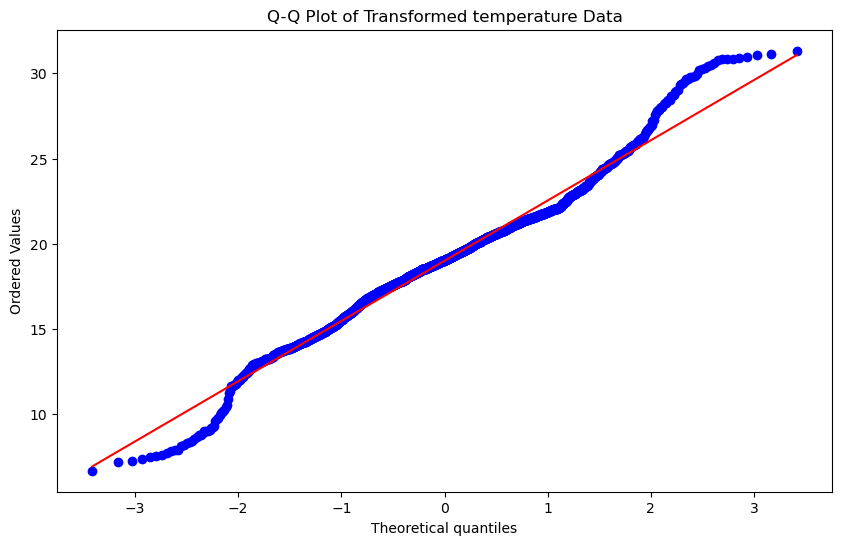

0       5358.698848
1       5128.301381
2       5402.832851
3       5106.504310
4       5303.752127
           ...     
2168    3427.700015
2169    2445.889629
2170    3517.104140
2171    2051.531784
2172    2802.845727
Name: humidity, Length: 2173, dtype: float64


C:\Users\engmo\AppData\Local\Temp\ipykernel_42944\1297661683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = transformed_values #updated


Optimal lambda for humidity data is: 2.1188982976573403


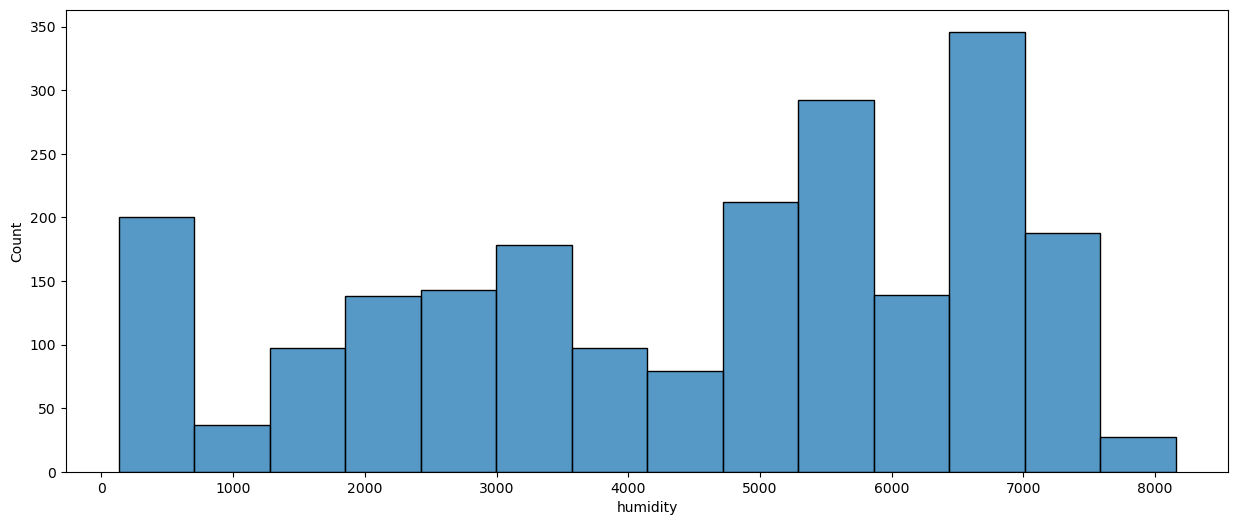

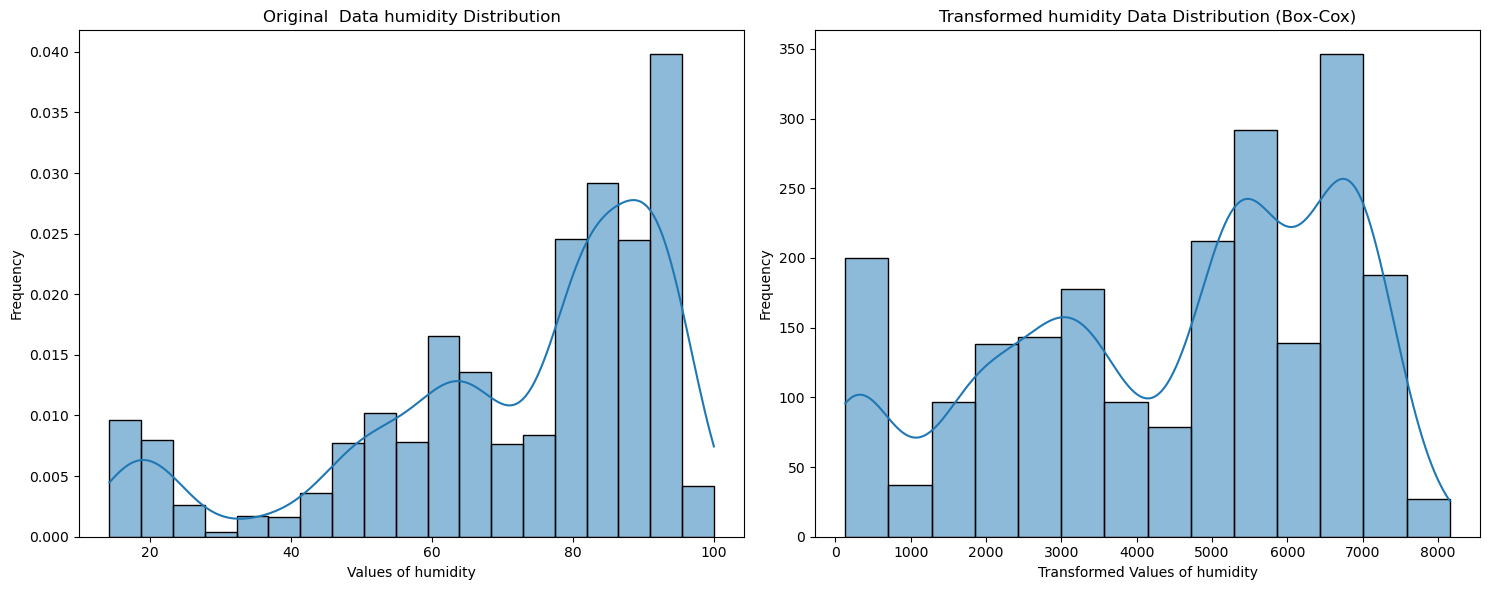

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9274288415908813, p-value=3.3037908198787238e-31


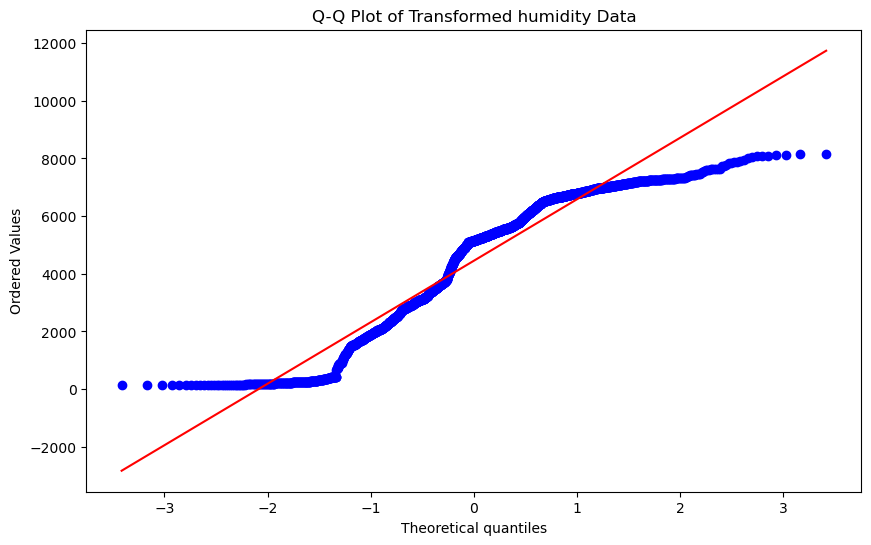

0       3.558669
1       3.820229
2       4.198759
3       3.792394
4       4.100306
          ...   
2168    3.695069
2169    3.349687
2170    3.488735
2171    3.684673
2172    3.694956
Name: ph, Length: 2173, dtype: float64


C:\Users\engmo\AppData\Local\Temp\ipykernel_42944\1297661683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = transformed_values #updated


Optimal lambda for ph data is: 0.625665330922685


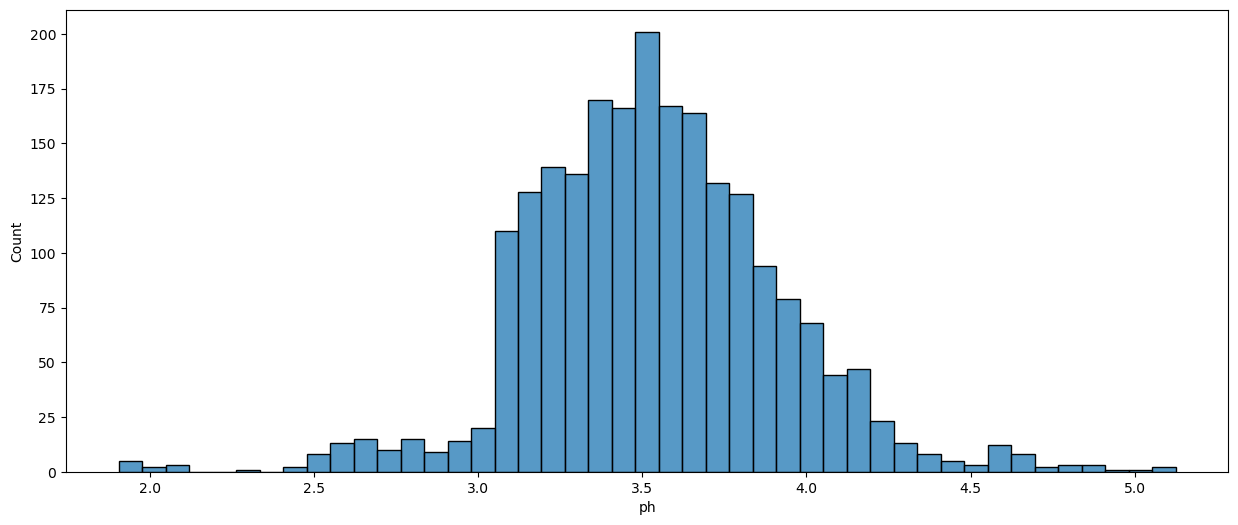

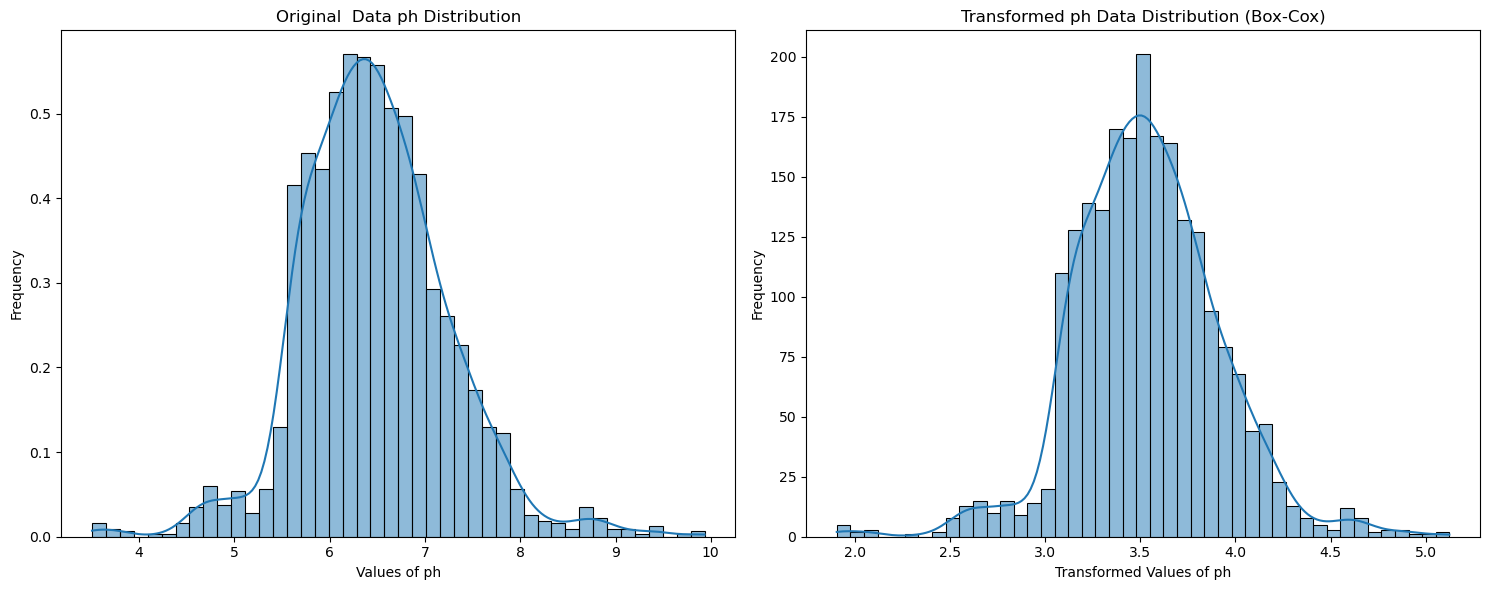

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9801652431488037, p-value=7.922950312247673e-17


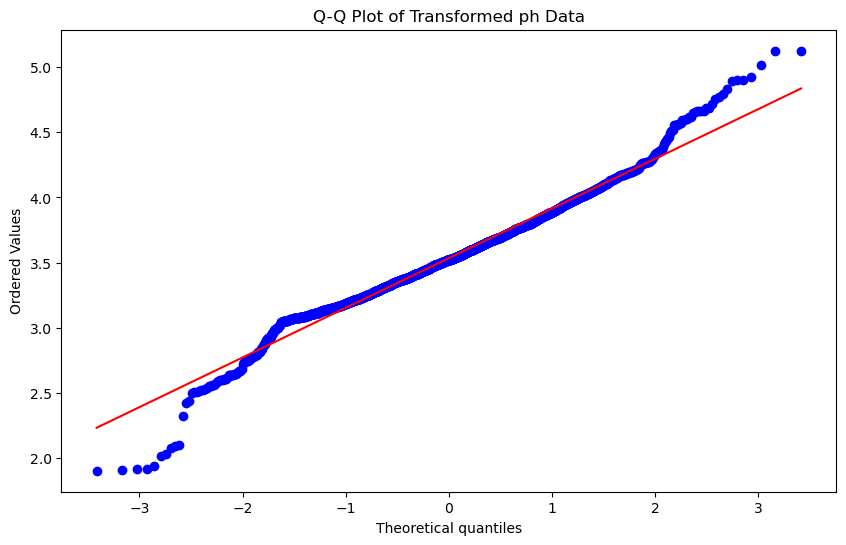

C:\Users\engmo\AppData\Local\Temp\ipykernel_42944\1297661683.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = transformed_values #updated


0        9.924880
1       10.275450
2       10.772570
3       10.498763
4       10.756877
          ...    
2168     9.515897
2169     8.548211
2170     9.438864
2171     8.531550
2172     8.826000
Name: rainfall, Length: 2173, dtype: float64
Optimal lambda for rainfall data is: 0.21499581286383765


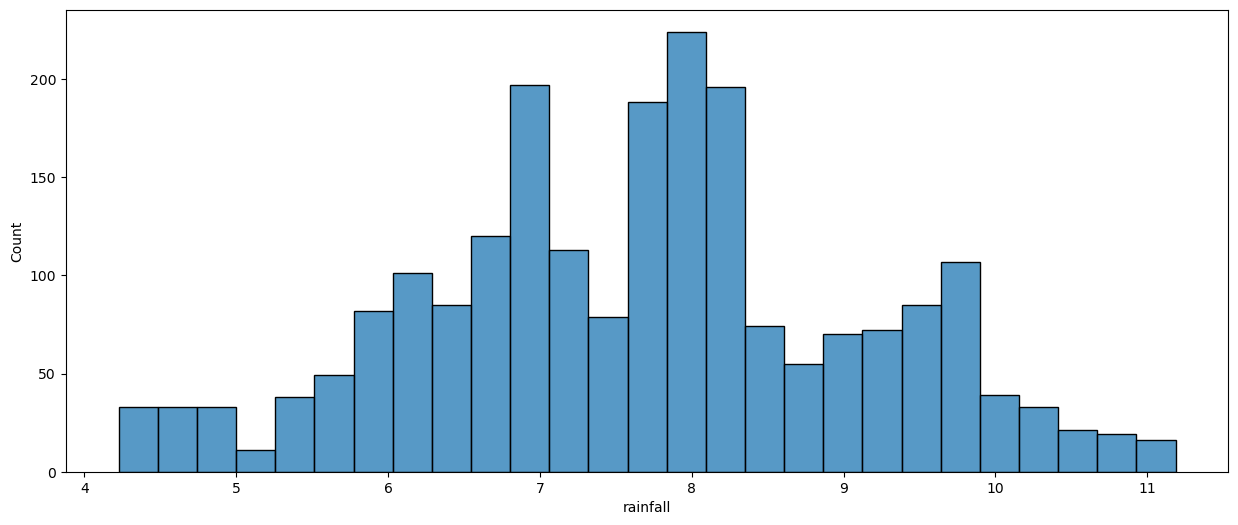

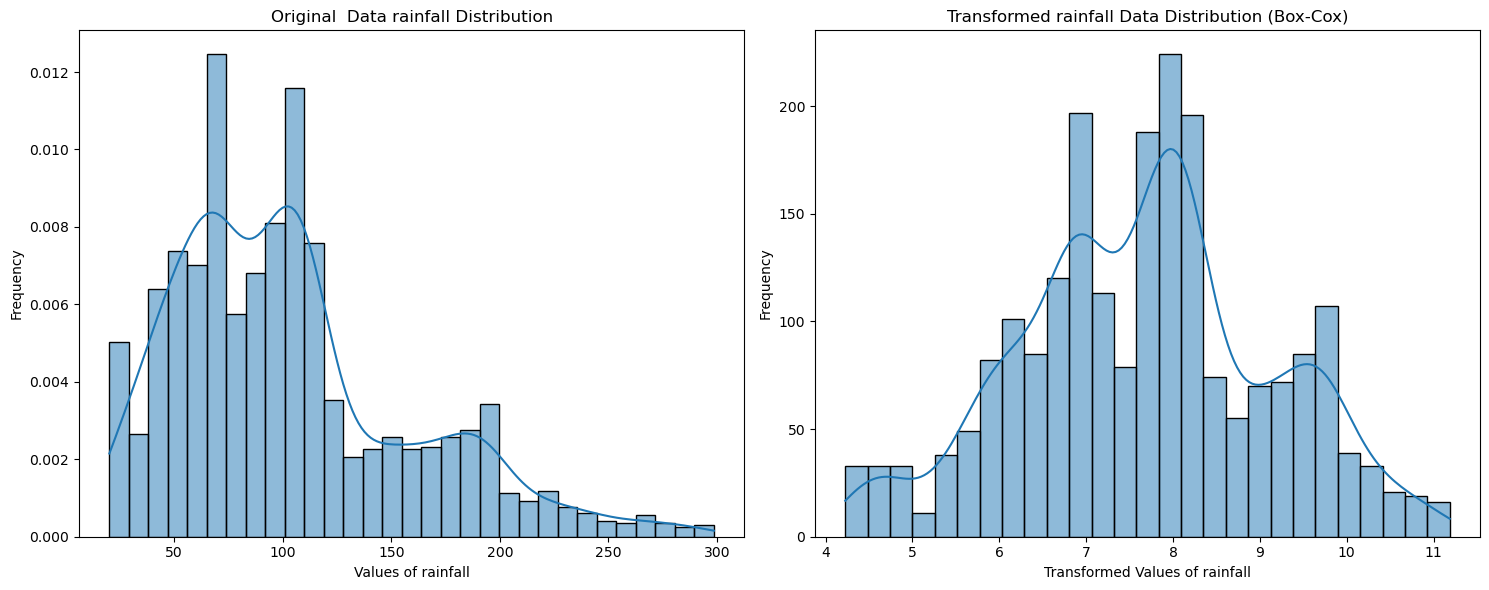

<Figure size 640x480 with 0 Axes>

Shapiro-Wilk Test: Statistic=0.9914329051971436, p-value=5.044795692299431e-10


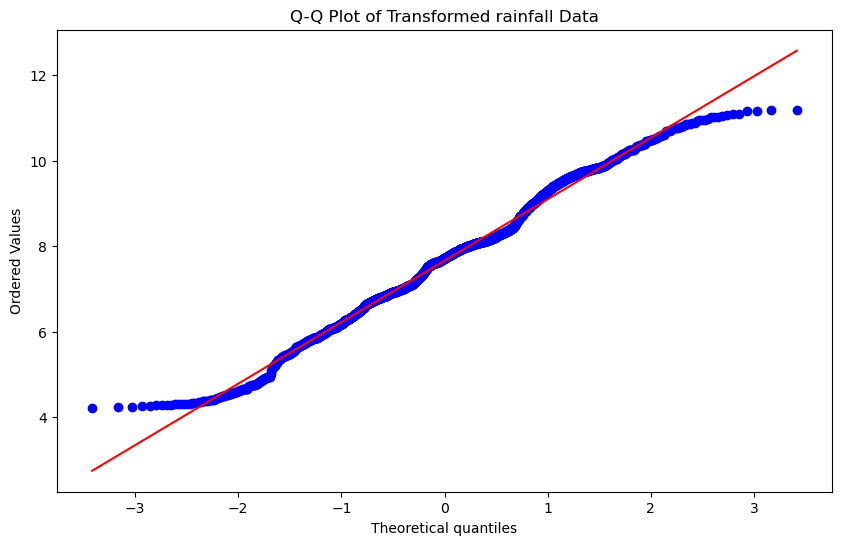

In [74]:
from scipy import stats

for i in data.select_dtypes(include="number").columns:
    # Remove non-positive values
    if (data[i] <= 0).any():
        data = data[data[i] > 0]
    data.reset_index(drop=True, inplace=True)#
    original=data[i]
    transformed_values, lambda_value = stats.boxcox(data[i].to_numpy())

# Add transformed values back to the DataFrame
    data[i] = transformed_values #updated

    print(data[i])
    plt.figure(figsize=(15, 6))  # Optional: Set figure size for better visibility
    sns.histplot(data[i], stat="count")

    # Calculate log-likelihood for transformed data
    print(f'Optimal lambda for {i} data is: {lambda_value}')
    plt.figure(figsize=(15, 6))

    # Original Data Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(original, kde=True, stat="density")
    plt.title(f'Original  Data {i} Distribution')
    plt.xlabel(f'Values of {i}')
    plt.ylabel('Frequency')

    # Transformed Data Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data[i], kde=True, stat="count")  # Using the updated Diphtheria column
    plt.title(f'Transformed {i} Data Distribution (Box-Cox)')
    plt.xlabel(f'Transformed Values of {i}')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk test for transformed data
    shapiro_test = stats.shapiro(data[i].dropna())
    print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

    # Q-Q plot for transformed data
    plt.figure(figsize=(10, 6))
    stats.probplot(data[i].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Transformed {i} Data')
    plt.show()



In [75]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for i in features:
    # Original values
    original = data[i].dropna()  # Drop NaN values for accurate calculations

    # Calculate mean and standard deviation
    mean = original.mean()
    std_dev = original.std()

    # Apply Z-score normalization
    data[i] = (original - mean) / std_dev

    # Print transformed values
    print(data[i])


0       1.043684
1       0.952896
2       0.443186
3       0.741370
4       0.820315
          ...   
2168    1.331773
2169    1.199862
2170    1.503948
2171    1.488699
2172    1.283014
Name: N, Length: 2173, dtype: float64
0      -0.172325
1       0.325343
2       0.239032
3      -0.426626
4      -0.172325
          ...   
2168   -0.465396
2169   -1.395232
2170   -0.504863
2171   -0.545060
2172   -1.213275
Name: P, Length: 2173, dtype: float64
0       0.421100
1       0.357861
2       0.451268
3       0.324677
4       0.389982
          ...   
2168    0.012095
2169   -0.241979
2170   -0.082729
2171    0.099330
2172   -0.082729
Name: K, Length: 2173, dtype: float64
0      -0.930559
1      -0.751522
2      -0.504798
3       0.184779
4      -1.081872
          ...   
2168    0.240403
2169    0.366204
2170   -0.280663
2171    0.141835
2172   -0.385648
Name: temperature, Length: 2173, dtype: float64
0       0.409552
1       0.305363
2       0.429510
3       0.295506
4       0.384705
     

C:\Users\engmo\AppData\Local\Temp\ipykernel_42944\1003024240.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = (original - mean) / std_dev


In [76]:
label_counts = df['label'].value_counts()

# Display the counts
print("Counts of each label:")
print(label_counts)

Counts of each label:
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


In [77]:
train_data = []
test_data = []

# Group the data by the 'label' column (the last column)
grouped = data.groupby('label')

# Iterate through each group (each crop type)
for label, group in grouped:
    # Shuffle the group to randomize the selection
    group = group.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Select 75 records for training
    train_records = group.head(75)
    train_data.append(train_records)
    
    # Select 20 records for testing
    test_records = group.iloc[75:95]
    test_data.append(test_records)

# Concatenate the training and testing data
train_data = pd.concat(train_data, ignore_index=True)
test_data = pd.concat(test_data, ignore_index=True)
train_data.head()
print("Training and test datasets created successfully.")


Training and test datasets created successfully.


In [79]:
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [80]:
# Separate features and labels for training and testing data
X_train = train_data.drop(columns=['label'])  # Features for training
y_train = train_data['label']  # Labels for training

X_test = test_data.drop(columns=['label'])  # Features for testing
y_test = test_data['label']  # Labels for testing

# Create and fit the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")

# Display the first few predictions
print("Predictions on the test set:")
print(y_pred[:10])


Accuracy of the model: 0.98
Predictions on the test set:
['mothbeans' 'chickpea' 'papaya' 'mango' 'orange' 'mungbean' 'kidneybeans'
 'coconut' 'watermelon' 'rice']
